<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/kmeansclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
np.random.seed(14)
n = 20
p = 2
k = 3
X = np.random.random((n,p))

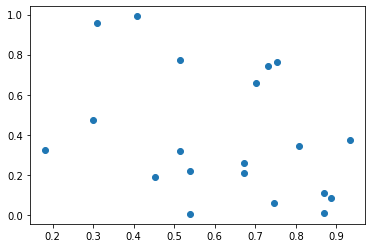

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
# init centers
centers = X[np.random.choice(n, k, replace=False)]

In [5]:
((X[0]-centers[0])**2).sum()**0.5

0.7676966627027265

In [6]:
((X-centers[0])**2).sum(axis=1)

array([0.58935817, 0.10992272, 0.95830097, 0.09826461, 0.04638914,
       0.18475782, 0.        , 0.05970414, 0.29067225, 0.6190457 ,
       0.12083103, 0.27701494, 0.08133111, 0.45029453, 0.22733973,
       0.12755829, 0.04631859, 0.57972669, 0.98838235, 0.04138358])

In [7]:
((X.reshape(n,1,p)-centers.reshape(1,k,p))**2).sum(axis=2)**0.5

array([[0.76769666, 0.78448615, 0.36700273],
       [0.33154596, 0.07722155, 0.73704815],
       [0.97892848, 1.04793878, 0.4827943 ],
       [0.31347187, 0.44202429, 0.26440458],
       [0.21538138, 0.37464254, 0.34858479],
       [0.42983464, 0.27129713, 0.52347543],
       [0.        , 0.35715303, 0.52632209],
       [0.2443443 , 0.24901305, 0.45753289],
       [0.53914029, 0.29435872, 0.64042595],
       [0.78679457, 0.6930882 , 0.53635628],
       [0.34760758, 0.03172537, 0.67708181],
       [0.52632209, 0.70598071, 0.        ],
       [0.2851861 , 0.27643117, 0.43155334],
       [0.67103989, 0.60317091, 0.44046217],
       [0.47680156, 0.74481974, 0.1931445 ],
       [0.35715303, 0.        , 0.70598071],
       [0.21521753, 0.14252875, 0.60789768],
       [0.76139786, 0.67738348, 0.50765081],
       [0.9941742 , 1.02691887, 0.52761227],
       [0.20342955, 0.44824302, 0.32304535]])

In [8]:
distances = np.zeros((n,k))
for i in range(k):
    distances[:,i] = ((X-centers[i])**2).sum(axis=1)**0.5
distances

array([[0.76769666, 0.78448615, 0.36700273],
       [0.33154596, 0.07722155, 0.73704815],
       [0.97892848, 1.04793878, 0.4827943 ],
       [0.31347187, 0.44202429, 0.26440458],
       [0.21538138, 0.37464254, 0.34858479],
       [0.42983464, 0.27129713, 0.52347543],
       [0.        , 0.35715303, 0.52632209],
       [0.2443443 , 0.24901305, 0.45753289],
       [0.53914029, 0.29435872, 0.64042595],
       [0.78679457, 0.6930882 , 0.53635628],
       [0.34760758, 0.03172537, 0.67708181],
       [0.52632209, 0.70598071, 0.        ],
       [0.2851861 , 0.27643117, 0.43155334],
       [0.67103989, 0.60317091, 0.44046217],
       [0.47680156, 0.74481974, 0.1931445 ],
       [0.35715303, 0.        , 0.70598071],
       [0.21521753, 0.14252875, 0.60789768],
       [0.76139786, 0.67738348, 0.50765081],
       [0.9941742 , 1.02691887, 0.52761227],
       [0.20342955, 0.44824302, 0.32304535]])

In [9]:
# update cluster membership
distances = cdist(X, centers)
closest = np.argmin(distances, axis=1)

In [10]:
X[closest == 0].mean(axis=0)

array([0.55084464, 0.15675788])

In [11]:
# update centers
for i in range(k):
    centers[i, :] = X[closest == i].mean(axis=0)
centers

array([[0.55084464, 0.15675788],
       [0.82671491, 0.17684988],
       [0.49020699, 0.66667282]])

In [12]:
np.random.seed(4160659)
centers = X[np.random.choice(n, k, replace=False)]
closest = np.zeros(n).astype(int)

while True:
    old_closest = closest.copy()
    print(closest)
    distances = cdist(X, centers)
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
        centers[i, :] = X[closest == i].mean(axis=0)
        
    if all(closest == old_closest):
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 2 1 1 1 0 1 1 2 1 2 1 2 2 1 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 2 1 2 2 0 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 2 1 2 1 0 0 2 2 1]
[2 0 2 1 1 1 0 1 1 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 1 0 1 0 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 0 1 0 0 2 0 1 1 2 1 0 0 2 2 1]
[2 0 2 1 1 0 1 0 0 2 0 1 0 2 1 0 0 2 2 1]


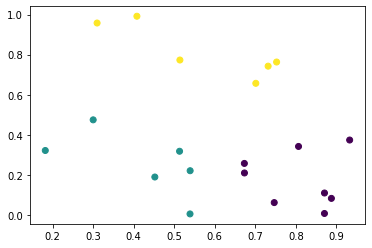

In [13]:
plt.scatter(X[:,0],X[:,1],c=closest)